# Streamchik online shop project

- **Project Objective** - to uncover patterns that determine the success of computer game sales, enabling us to bet on a potentially popular product and strategize advertising campaigns.

### 1. Opening a data file and exploring the general information.

In [1]:
# Connect basic libraries and read external data

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

data = pd.read_csv('/Users/elenpogosan/python_data/games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
# Dataframe: 16715 rows, 11 columns.

data.info()
#data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# View a statistical summary of each column with data distribution
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div class="alert alert-info">
<b> The summary table is not very informative, but we can notice some points: - Values in the column "year_of_release" are representative, it is only necessary to convert to int; - Values in the column "critic_score" are also representative, but the number is 8137, i.e. there are a lot of gaps in the data; - The rest of the columns have a similar picture: 1) There are no gaps, all of them have 16715 rows. There are a lot of omissions in the data; - The rest of the columns have a similar picture: 1) There are no omissions, all 16715 rows, this is good; 2) It is alarming that the median and 25% values show either 0 or close to 0 values, it is difficult to imagine that the median revenue = 0, but more details can be seen in further analysis; 3) Average values (mean) are negligible but look reliable; 4) Maximum values (max) also look reliable.
    </b> 
</div>

### 2. Data preparation

In [4]:
# Replacing column names (lower case)

# data.columns = [x.lower() for x in data.columns]
data.columns = data.columns.str.lower()

In [5]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Number of column omissions

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# Let's start with the omissions in the "year_of_release" column, since there are no logical substitutions to fill, we can leave it as it is.
# Or substitute a "blank" - "0" and convert it to int and filter it constantly when outputting, for example, a graph.

data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype(int)

In [8]:
#Check for empty rows and data type of 'year_of_release' column after processing
print(data['year_of_release'].isna().sum())
print(data['year_of_release'].dtypes)

0
int64


In [9]:
# In the columns "name" and "genre" there are only 2 skips each, and also without logical substitutions, let's display them for review
display(data.query('genre.isna()'))
display(data.query('name.isna()'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# These skips coincide, so there are 2 skips in 2 columns, taking into account the number of skips in other columns as well.
# It is possible to delete these rows without losing data quality
data = data[data['genre'].notnull()]
data = data[data['name'].notnull()]

In [11]:
#Check for empty rows in 'genre' and 'name' columns after processing
print(data['genre'].isna().sum())
print(data['name'].isna().sum())

0
0


The omissions in Critic_Score - critics score, could appear due to the lack of rating for games, filling with average or median (even taking into account the genre) can distort the data because each game is unique and there is no direct connection between them. In order to be able to process this data in the future you can replace it with 0 (checking in advance that there is no game with rating 0).

In [12]:
(data['critic_score'] == 0).sum()

0

In [13]:
data['critic_score'] = data['critic_score'].fillna(0)

In [14]:
#Check for empty rows in the 'critic_score' column after processing
print(data['critic_score'].isna().sum())

0


Column (User_Score - user score) by analogy with "critic_score" can be replaced by "0" having checked beforehand, but the data type in this column is "object", it may indicate that the column contains combined data types, besides real numbers there are text "str".

In [15]:
# Checking unique values
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
data[data['user_score'] == 'tbd'].shape

(2424, 11)

The number of values is 2424 rows. 'tbd' stands for To Be Determined - ratings for such games are yet to be determined, perhaps not enough reviews or for rating calculation and publication. These values by analogy with 'critic_score' are set to '0'.

In [17]:
# Replacing NaN with 0, then replacing "tbd" with 0 and converting to "float" type
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].replace('tbd', 0)
data['user_score'] = data['user_score'].astype(float)

In [18]:
#Checking for empty strings and data type
print(data['user_score'].isna().sum())
print(data['user_score'].dtypes)

0
float64


There are no logical substitutions for the 'rating' column either, you can put a 'stub' unknown to save the data

In [19]:
# Replacing 'rating' with 'unknown'
data['rating'] = data['rating'].fillna('unknown')

In [20]:
# Checking DateFrame for skips
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [21]:
# Checking DateFrame for data type after all substitutions
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [22]:
# Calculate the total sales in all regions and record them in a separate column.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38


### 3. Conducting exploratory analyses of data

- Look at how many games were released in different years. Is it important to look at all periods?
- Look at how sales varied by platform. Choose the platforms with the highest total sales and plot the distribution by year. Over what characteristic timeframe do new platforms appear and old platforms disappear?
- Take the data for the relevant current period. Determine the relevant period on your own as a result of researching the previous questions. The main factor is that this data will help you build a forecast for 2017.
- Which platforms are leading sales, growing or falling? Select a few potentially profitable platforms.
- Construct a "box-and-whisker" graph of global game sales by platform. Describe the results.
- See how sales within one popular platform are affected by user and critic reviews. Construct a scatter plot and calculate the correlation between reviews and sales. Formulate conclusions.
- Relate the conclusions to game sales on other platforms.
- Look at the overall distribution of games by genre. What can you say about the most profitable genres? Do genres with high and low sales stand out?

In [24]:
# Filtering the 'year_of_release' column from 'stubs'
zero_filt = data.loc[data['year_of_release'] > 0]

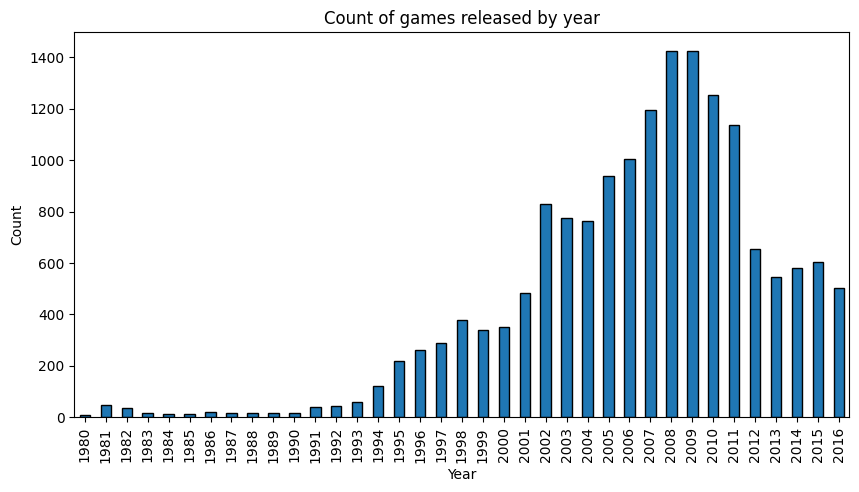

In [25]:
# Release of games by year
zero_filt.groupby(by='year_of_release')['name'].agg('count').plot(kind='bar', figsize=(10,5), ec='black')
plt.title('Count of games released by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show();

- The graph shows that before 1993 very few games were released due to the lack of good and affordable platforms;
- From 1994 to 2009 there was a rapid growth of the video game market, reaching up to 1400 games per year, this is due to the development of new devices, the release of new operating systems and, accordingly, there are new gaming platforms;
- After 2009, the market experienced a decline in the "consumption" of game content specifically on stationary platforms, with the emergence of mobile devices and social networks, most consumers moved to these new platforms for games.

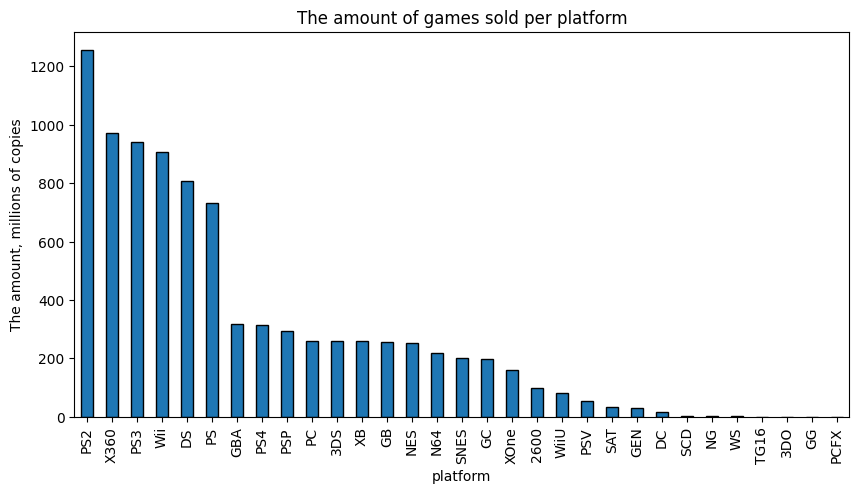

In [26]:
# Releasing games on different gaming platforms
count_platform = data.groupby(by='platform')['total_sales'].agg('sum')
count_platform.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), ec='black')
plt.title('The amount of games sold per platform')
plt.xlabel('platform')
plt.ylabel('The amount, millions of copies')
plt.show();

The most popular platforms with the maximum number of released games are Sony PlayStation console of different versions and Microsoft Xbox 360 console, followed by Wii and DS consoles, and the rest are far behind the leaders.

In [27]:
# Sorting the top platforms by total sales
data.groupby(by='platform')['total_sales'].sum().to_frame('total_sales').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


- According to the analysis, we can select the top 6 platforms

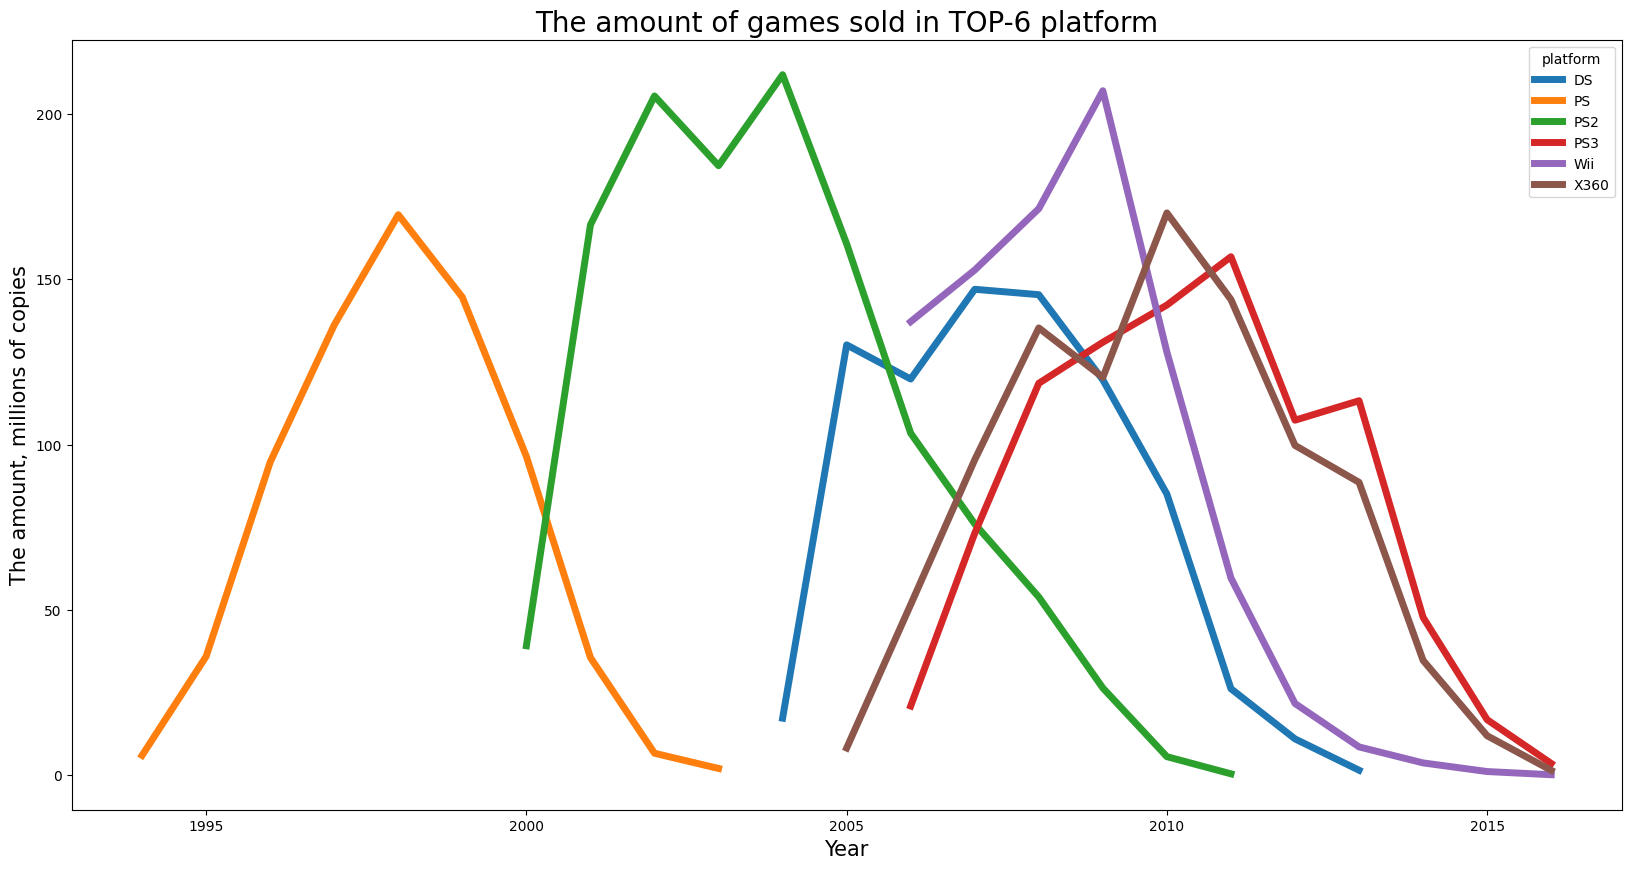

In [28]:
# Selection of the best platforms, according to the quotation these are the first 6 platforms
top = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).\
reset_index().head(6)['platform']
# top = ('PS2','X360','PS3','Wii','DS','PS')

# Line graph of sales by year for the top 6 platforms
data.query('platform in @top and year_of_release > 1990').\
pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='sum').reset_index().\
plot(x='year_of_release', figsize=(20,10), linewidth=5)
plt.title('The amount of games sold in TOP-6 platform', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('The amount, millions of copies', fontsize=15)
plt.show();

- PS - was relevant from 1994 to 2003, almost 10 years;
- PS2 - was relevant from 2000 to 2011, 11 years;
- PS3 - was relevant from 2006 to 2016 - 10 years;
- DS - growing in popularity from 2004 to 2013 - 8 years;
- Wii - from 2006 to 2016 - 10 years.

 **On average, game platforms are relevant for 10 years.**

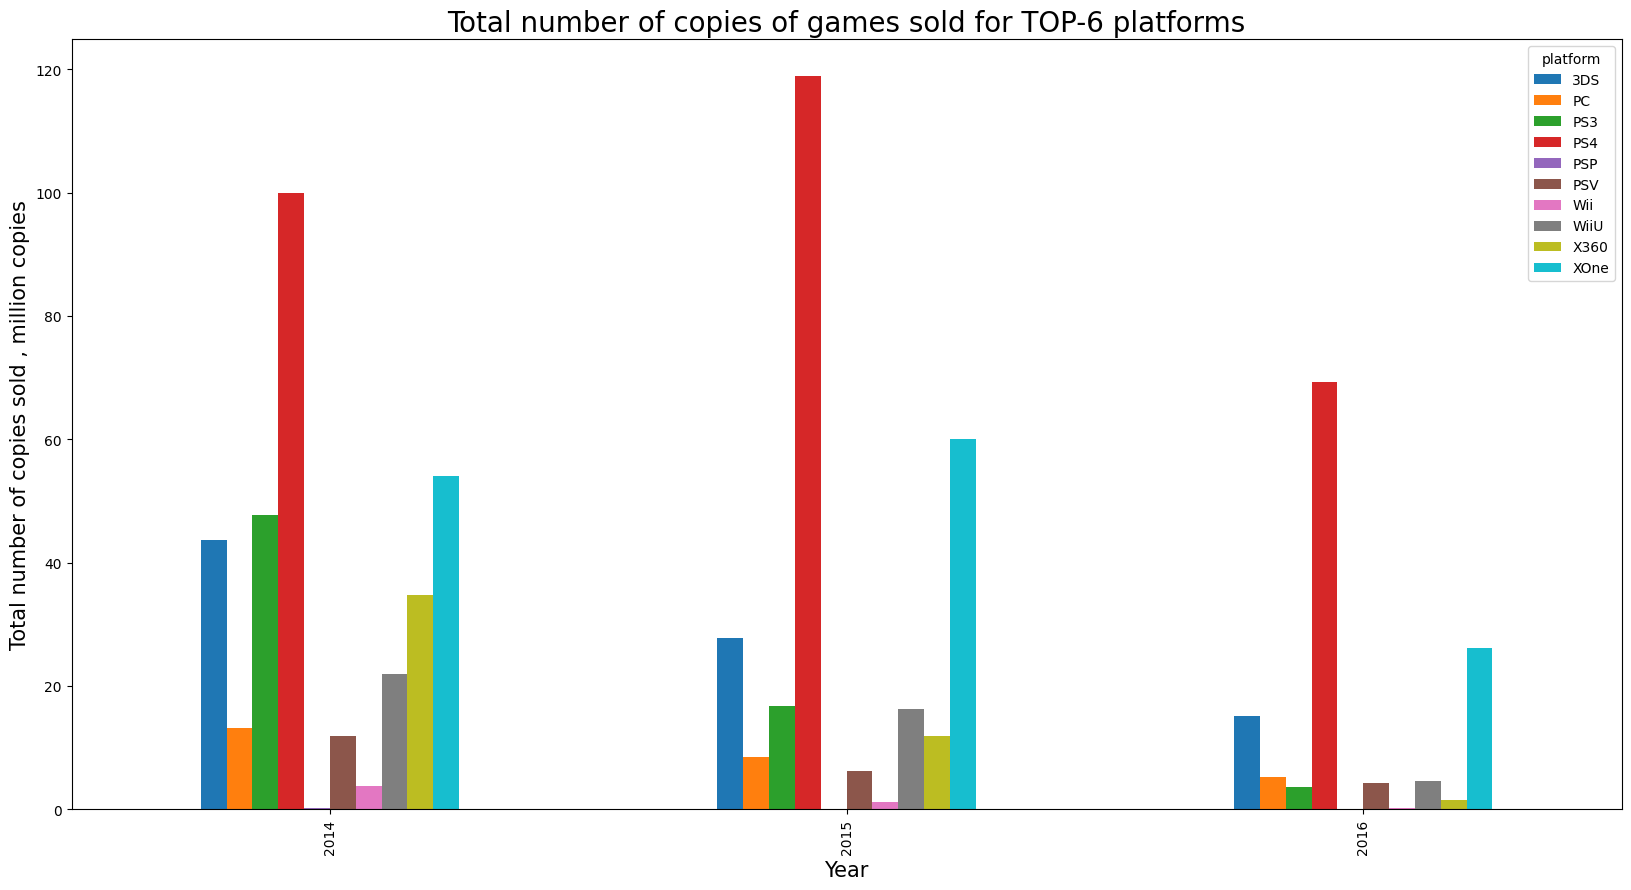

In [29]:
# Platform sorting since 2014
top = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).\
reset_index()['platform']

#  Pillar chart of sales from 2014
data.query('platform in @top and year_of_release >= 2014').\
pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='sum').reset_index().\
plot(kind='bar', x='year_of_release', figsize=(20,10), linewidth=2)
plt.title('Total number of copies of games sold for TOP-6 platforms', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total number of copies sold , million copies', fontsize=15)
plt.show();

The bar chart shows the platforms from 2014, for analysis we can take the period 2014 - 2016, for these 3 years we can see the growth of 3 platforms relative to competitors (although the whole market is falling):
 1) PS4
 2) XOne
 3) 3DS

In [30]:
# Summary table of total sales of all platforms since 2014
year_filt = data.loc[data['year_of_release'] >= 2014]
year_filt.pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


- Table with total sales to confirm the data of the graph, you can see that relative to these platforms (PS4, XOne, 3DS) the others are far behind, so you can focus your attention on these platforms

In [31]:
# Filtering column 'year_of_release' >= 2014
boxplt_filt = data.loc[data['year_of_release'] >= 2014]

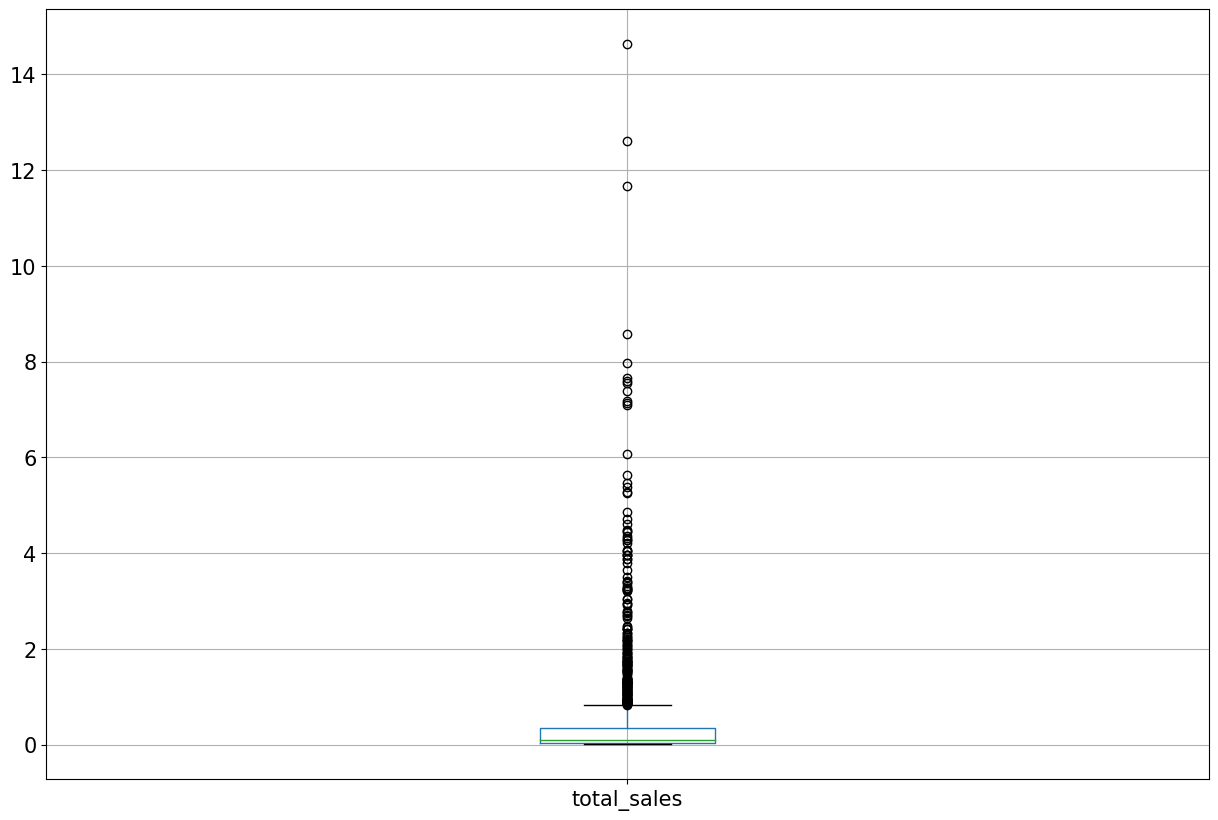

In [32]:
# a "box-and-whisker" chart with a breakdown of total sales data
boxplt_filt.boxplot(column='total_sales', fontsize=15, figsize=(15,10));

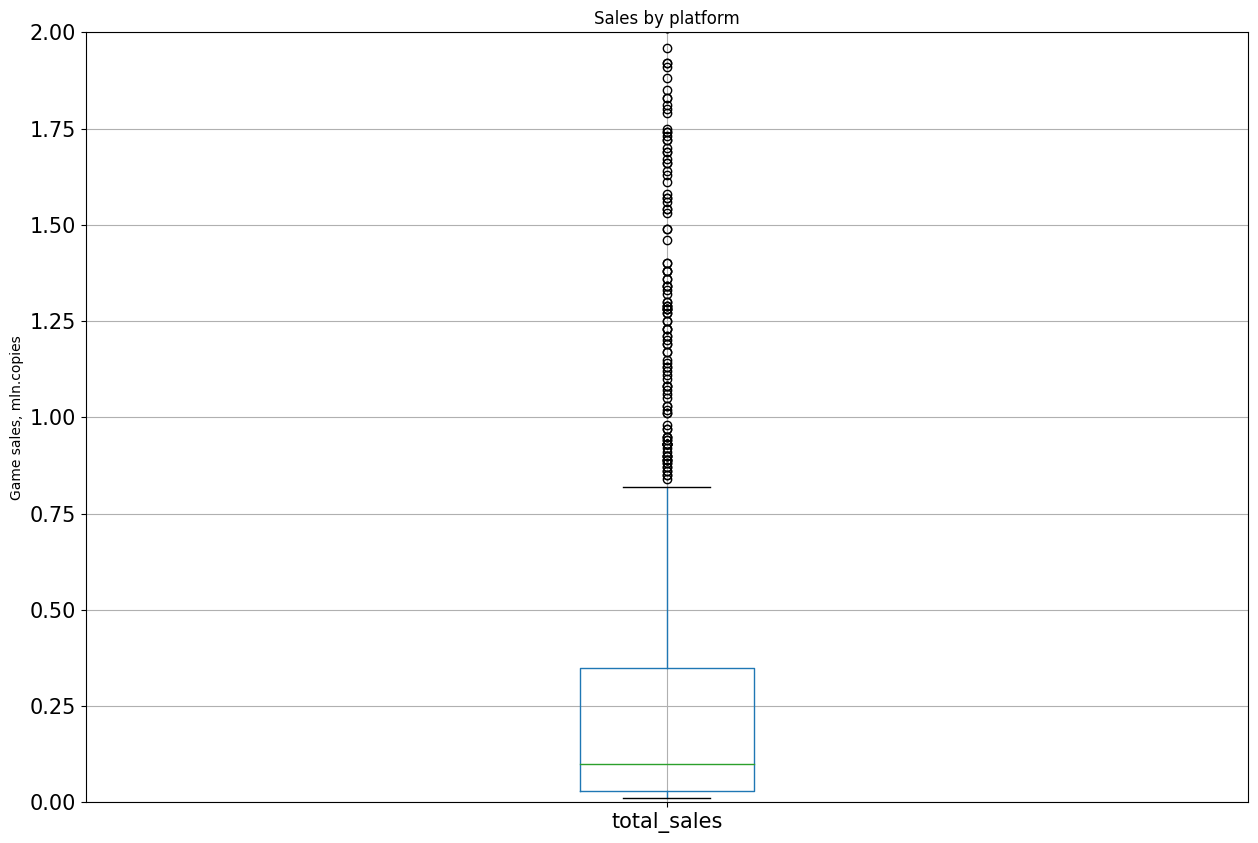

In [33]:
# box-and-whisker chart with a breakdown of total sales data (in more detail)
boxplt_filt.boxplot(column='total_sales', fontsize=15, figsize=(15,10)).\
    set(title='Sales by platform', ylabel='Game sales, mln.copies', ylim=(0,2))
plt.show();

In [34]:
boxplt_filt['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

**The average total sales (mean) is 0.43 million and the median = 0.1 million.**

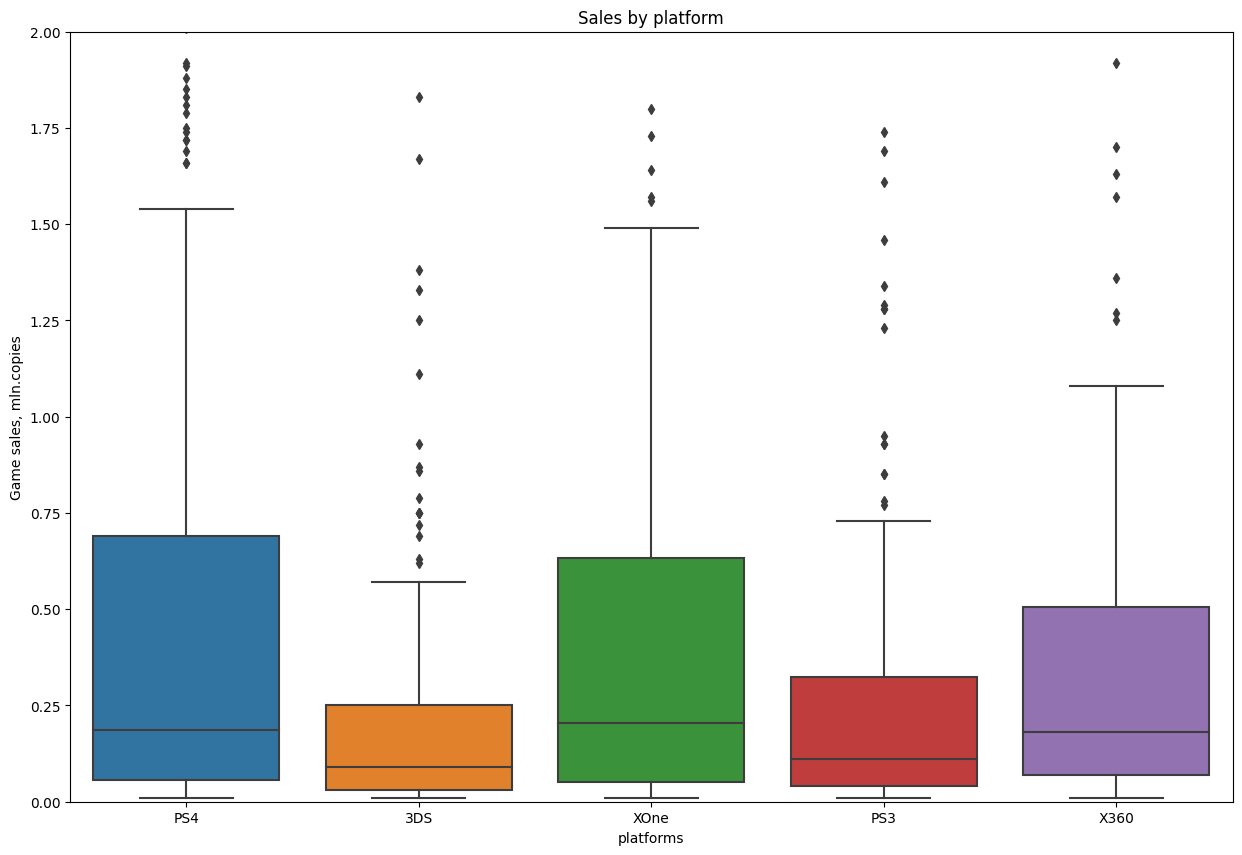

In [35]:
# a box-and-whiskers chart with a breakdown of data by popular platforms
top_sales_platform = data.query("platform in ['PS4', 'XOne', '3DS', 'PS3', 'X360'] and year_of_release >= 2014")

plt.figure(figsize=(15,10))
sns.boxplot(data=top_sales_platform, x='platform', y='total_sales').\
    set(title='Sales by platform', xlabel='platforms', ylabel='Game sales, mln.copies', ylim=(0,2))
plt.show()

- The median profit for the selected platforms is on average between 0.1 and 0.2 million.
- Two platforms, PS4 and XOne, have upper limits beyond which anomalies are already defined, at ±1.5 million.
- The 3DS and PS3 platforms differ from their competitors, with limits of ±0.65 and medians around 0.1 million

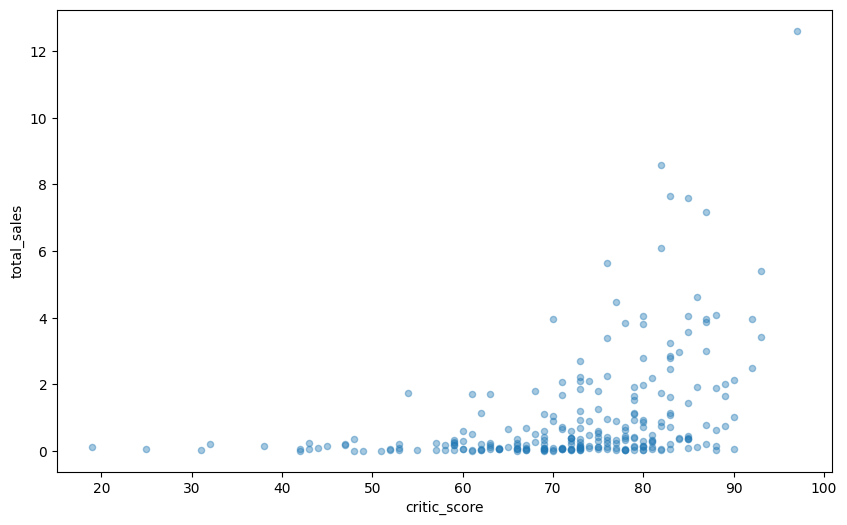

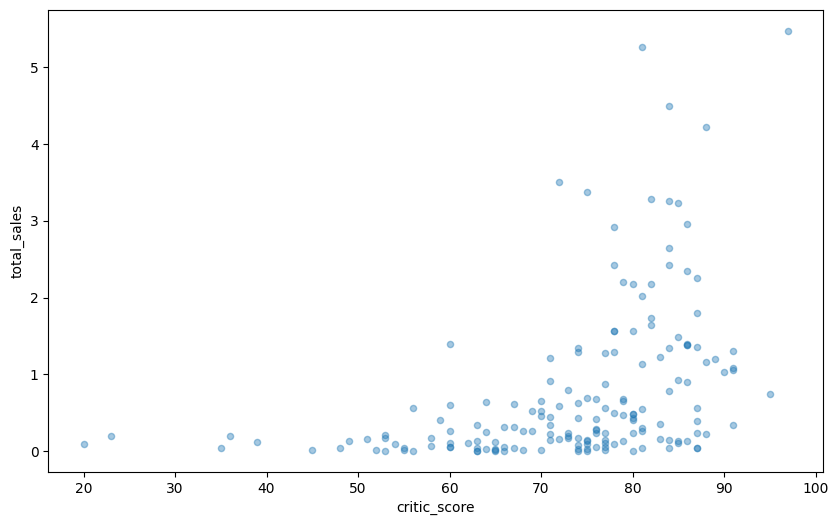

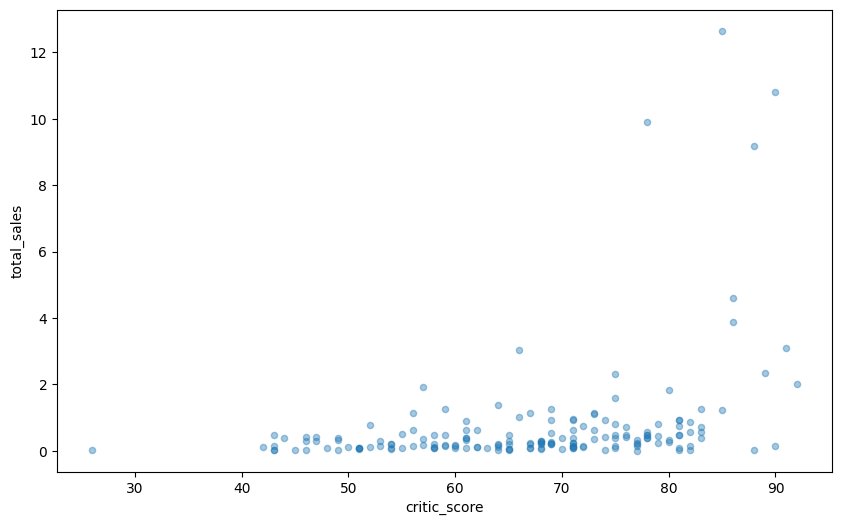

In [36]:
# Scatter chart for the top 3 platforms from 2014 (PS4, XOne, 3DS) and critics' scores
platform_PS4 = data[(data['platform'] == 'PS4') & (data['critic_score'] > 0)]
platform_PS4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,6), alpha=0.4);

platform_XOne = data[(data['platform'] == 'XOne') & (data['critic_score'] > 0)]
platform_XOne.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,6), alpha=0.4);

platform_3DS = data[(data['platform'] == '3DS') & (data['critic_score'] > 0)]
platform_3DS.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,6), alpha=0.4);

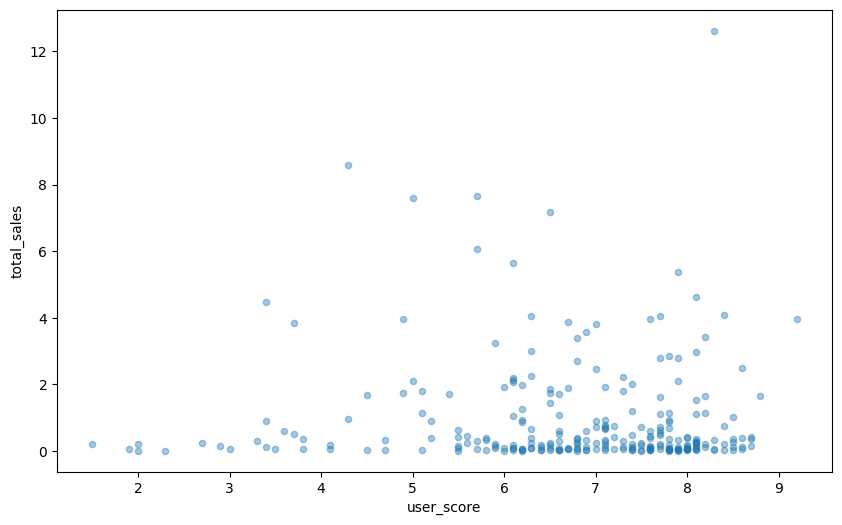

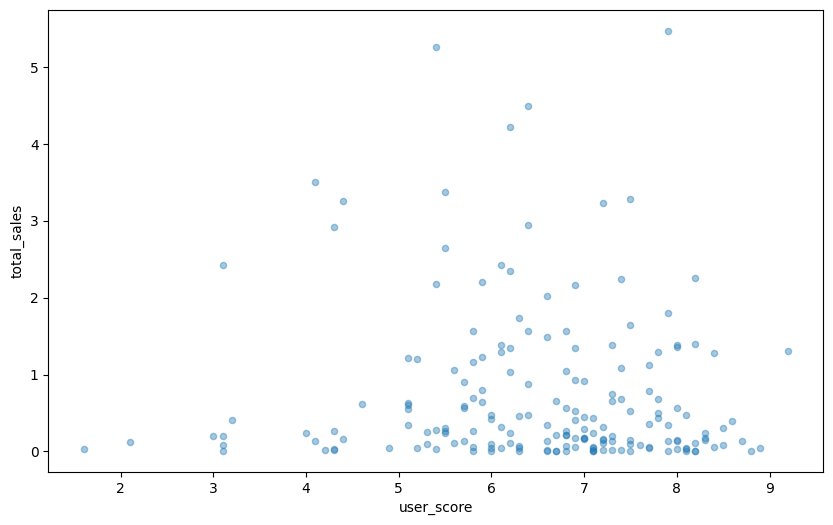

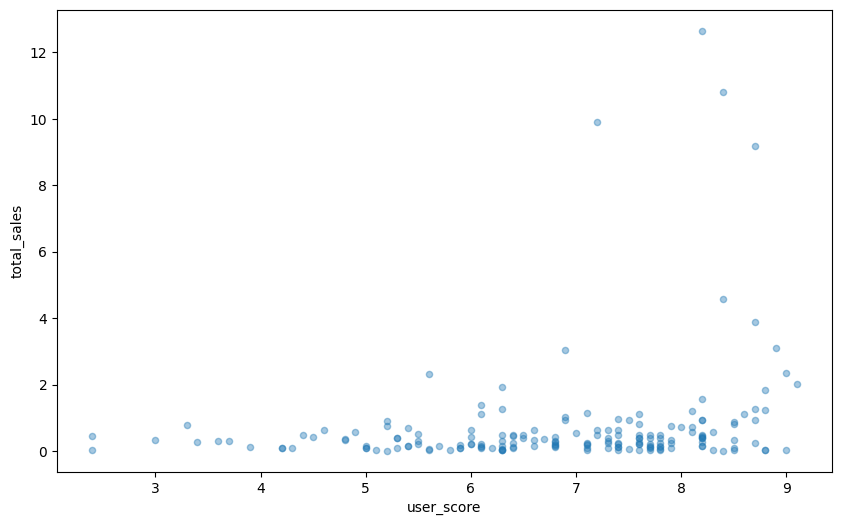

In [37]:
# диаграмма рассеивания для 3х лучших платформ с 2014 года (PS4, XOne, 3DS) и оценки игроков
platform_PS4 = data[(data['platform'] == 'PS4') & (data['user_score'] > 0)]
platform_PS4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,6), alpha=0.4);

platform_XOne = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]
platform_XOne.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,6), alpha=0.4);

platform_3DS = data[(data['platform'] == '3DS') & (data['user_score'] > 0)]
platform_3DS.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,6), alpha=0.4);

- Visually, you can see from the scatter chart for the 3 platforms (PS4, XOne, 3DS) from 2014 that the correlation between sales and critics and player scores is very weak....

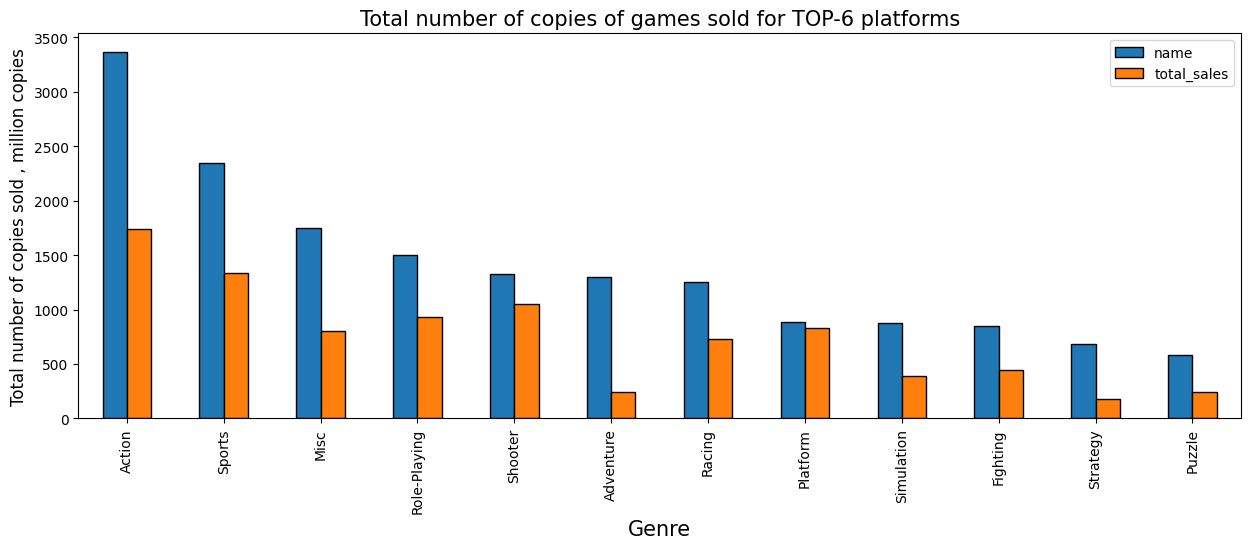

In [38]:
# Look at the overall distribution of games by genre.
# What can you say about the most profitable genres? Do genres with high and low sales stand out?
pivot = data.groupby(by='genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

pivot.plot(kind='bar', figsize=(15,5), ec='black')
plt.title('Total number of copies of games sold for TOP-6 platforms', fontsize=15)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Total number of copies sold , million copies', fontsize=12)
plt.show();

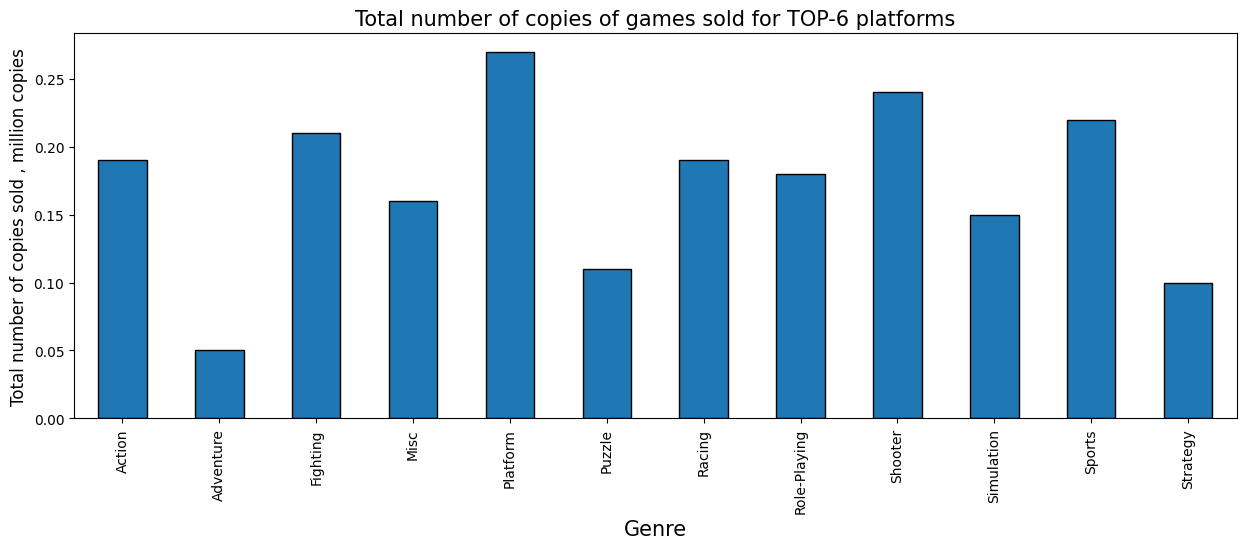

In [39]:
data.groupby(by='genre')['total_sales'].median().plot(kind='bar', figsize=(15,5), ec='black')
plt.title('Total number of copies of games sold for TOP-6 platforms', fontsize=15)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Total number of copies sold , million copies', fontsize=12)
plt.show();

In [40]:
median_sales = data.groupby(by='genre')['total_sales'].median()
print(median_sales)


genre
Action          0.19
Adventure       0.05
Fighting        0.21
Misc            0.16
Platform        0.27
Puzzle          0.11
Racing          0.19
Role-Playing    0.18
Shooter         0.24
Simulation      0.15
Sports          0.22
Strategy        0.10
Name: total_sales, dtype: float64


- Leaders in the number of games is the genre Action. in second place is the genre Sports.
- Revenue from sales in some genres is almost the same, although the number of games sold may differ, it may speak about the price of the game in a particular genre, games in certain genres are cheaper or more expensive (this may be due to the cost of production as the production of a game in the genre Puzzle is much cheaper than the genre Sports or Action).
- Top 3 by number of games: Action, Sports, Misc
- Top 3 by sales: Action, Sports, Shooter
- Top 3 by median sales: Platform, Shooter, Sports
- Most lagging genres: Puzzle, Strategy, Adventure

### 4. Creating a user profile of each region

Define for the user of each region (NA, EU, JP):
- Most popular platforms (top 5). Describe the differences in sales shares.
- Most popular genres (top 5). Explain the differences.
- Does the ESRB ranking affect sales in an individual region?

#### 4.1 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [41]:
# Summary table by platform and sales amount from 2014 - 2016.
top5_plt = data.query('year_of_release >= 2014').groupby('platform').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum',}).\
sort_values(by='na_sales', ascending=False).round().reset_index()
top5_plt.loc[5] = ['Другие',
                   top5_plt.loc[5]['na_sales'].sum().round(2),
                   top5_plt.loc[5]['eu_sales'].sum().round(2),
                   top5_plt.loc[5]['jp_sales'].sum().round(2)]
top5_plt[:6]

,platform,na_sales,eu_sales,jp_sales
0,PS4,99.0,130.0,15.0
1,XOne,81.0,46.0,0.0
2,X360,28.0,15.0,0.0
3,3DS,23.0,16.0,44.0
4,PS3,22.0,26.0,11.0
5,Другие,19.0,13.0,7.0


In [42]:
# Adding columns with percentages
top5_plt['na_percent'] = (top5_plt['na_sales'] / top5_plt['na_sales'].sum()) * 100
top5_plt['eu_percent'] = (top5_plt['eu_sales'] / top5_plt['eu_sales'].sum()) * 100
top5_plt['jp_percent'] = (top5_plt['jp_sales'] / top5_plt['jp_sales'].sum()) * 100

In [43]:
top5_plt[:6]

,platform,na_sales,eu_sales,jp_sales,na_percent,eu_percent,jp_percent
0,PS4,99.0,130.0,15.0,34.859155,47.970480,16.304348
1,XOne,81.0,46.0,0.0,28.521127,16.974170,0.000000
2,X360,28.0,15.0,0.0,9.859155,5.535055,0.000000
3,3DS,23.0,16.0,44.0,8.098592,5.904059,47.826087
4,PS3,22.0,26.0,11.0,7.746479,9.594096,11.956522
5,Другие,19.0,13.0,7.0,6.690141,4.797048,7.608696


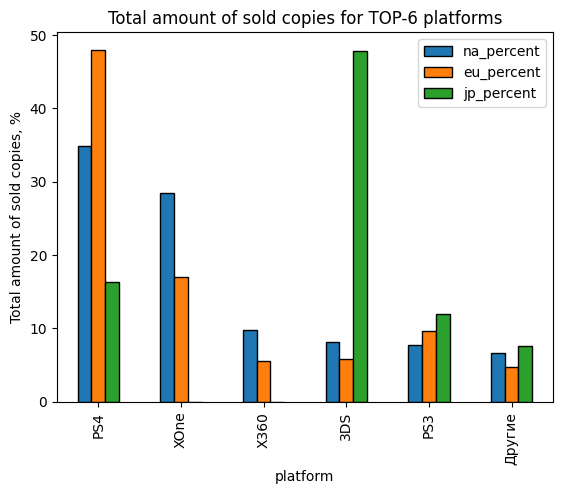

In [44]:
top5_plt[:6].plot(kind='bar', x='platform', y=['na_percent', 'eu_percent', 'jp_percent'], ec='black')
plt.title('Total amount of sold copies for TOP-6 platforms', fontsize=12)
plt.xlabel('platform')
plt.ylabel('Total amount of sold copies, %')
plt.show();

**Conclusion of 4.1**
- The leaders in North America and Europe are PS4 and XOne.

- In Europe, PS4 is more popular and in North America XOne is more popular.

- In Japan, 3DS is the absolute leader, followed by PS4 and PS3.

#### 4.2 - Most popular genres (top 5). Explain the difference.

In [45]:
top5_genre_plt = data.query('year_of_release >= 2014').groupby('genre').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum',}).\
sort_values(by='na_sales', ascending=False).round().reset_index()
top5_genre_plt.loc[5] = ['Другие',
                   top5_plt.loc[5]['na_sales'].sum().round(2),
                   top5_plt.loc[5]['eu_sales'].sum().round(2),
                   top5_plt.loc[5]['jp_sales'].sum().round(2)]

top5_genre_plt['na_percent'] = (top5_genre_plt['na_sales'] / top5_genre_plt['na_sales'].sum()) * 100
top5_genre_plt['eu_percent'] = (top5_genre_plt['eu_sales'] / top5_genre_plt['eu_sales'].sum()) * 100
top5_genre_plt['jp_percent'] = (top5_genre_plt['jp_sales'] / top5_genre_plt['jp_sales'].sum()) * 100

top5_genre_plt[:6]

,genre,na_sales,eu_sales,jp_sales,na_percent,eu_percent,jp_percent
0,Shooter,79.0,66.0,5.0,27.054795,23.741007,5.263158
1,Action,73.0,75.0,30.0,25.000000,26.978417,31.578947
2,Sports,46.0,46.0,3.0,15.753425,16.546763,3.157895
3,Role-Playing,33.0,28.0,31.0,11.301370,10.071942,32.631579
4,Misc,15.0,13.0,6.0,5.136986,4.676259,6.315789
5,Другие,19.0,13.0,7.0,6.506849,4.676259,7.368421


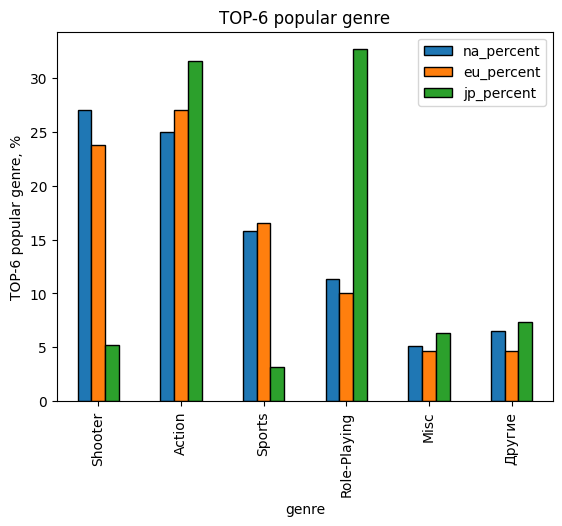

In [46]:
top5_genre_plt[:6].plot(kind='bar', x='genre', y=['na_percent', 'eu_percent', 'jp_percent'], ec='black')
plt.title('TOP-6 popular genre', fontsize=12)
plt.xlabel('genre')
plt.ylabel('TOP-6 popular genre, %')
plt.show();

**Conclusion on p.4.2**
- The most popular genres in North America are Shooter, Action, Sports;
- In Europe, the most popular genre is Action, followed by Shooter and Sports;
- Japan stands out by preferences, the most popular genre is Role-Playing, followed by Action in 2nd place.

#### 4.3 - Does the ESRB rating affect sales in an individual region?

In [47]:
# Replacing ratings
ESRB_plt = data.query('year_of_release >= 2014').groupby('rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum',}).\
sort_values(by='na_sales', ascending=False).round().reset_index()

ESRB_plt['na_percent'] = (ESRB_plt['na_sales'] / ESRB_plt['na_sales'].sum()) * 100
ESRB_plt['eu_percent'] = (ESRB_plt['eu_sales'] / ESRB_plt['eu_sales'].sum()) * 100
ESRB_plt['jp_percent'] = (ESRB_plt['jp_sales'] / ESRB_plt['jp_sales'].sum()) * 100

ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '> 13 лет', 'E10+': 'Для всех >10 лет', 'EC': 'Для детей > 3 лет', 'RP': 'Рейтинг ожидается', 'unknown': 'unknown'}

ESRB_plt['ESRB_description'] = ESRB_plt[ESRB_plt['rating'].notnull()]['rating'].map(ESRB_dict)

In [48]:
# Deleting the string "unknown"
ESRB_plt = ESRB_plt.drop(labels = [1],axis = 0)

In [49]:
ESRB_plt

,rating,na_sales,eu_sales,jp_sales,na_percent,eu_percent,jp_percent,ESRB_description
0,M,96.0,93.0,8.0,33.802817,34.444444,8.602151,> 17 лет
2,E,51.0,58.0,9.0,17.957746,21.481481,9.677419,Для всех
3,T,39.0,34.0,15.0,13.732394,12.592593,16.129032,> 13 лет
4,E10+,33.0,26.0,4.0,11.619718,9.629630,4.301075,Для всех >10 лет


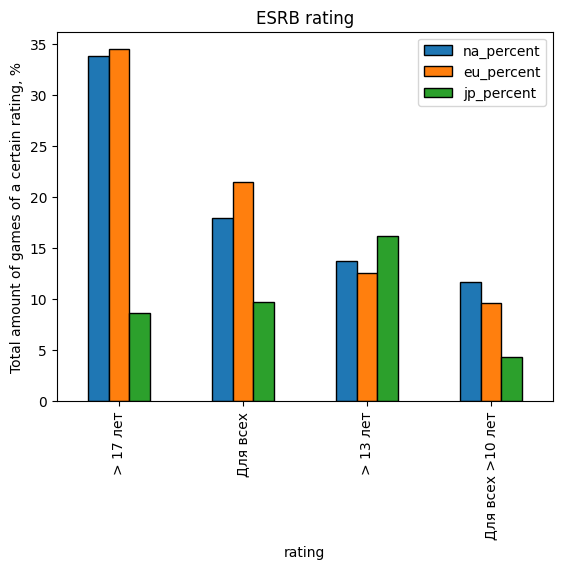

In [50]:
ESRB_plt.plot(kind='bar', x='ESRB_description', y=['na_percent', 'eu_percent', 'jp_percent'], ec='black')
plt.title('ESRB rating', fontsize=12)
plt.xlabel('rating')
plt.ylabel('Total amount of games of a certain rating, %')
plt.show();

**Findings from 4.3**
- The values of North America and Europe are almost identical, with the "> 17 years" category in 1st place, followed by the "For All" category;

- In Japan, the most popular category is "> 13 years", while the categories "> 17 years" and "For All" are in 2nd and 3rd place with a slight difference.

### 5. Hypothesis testing

- The average user ratings for Xbox One and PC platforms are the same;
- The average user ratings of Action and Sports genres are different.

#### 5.1 - The average user ratings of the Xbox One and PC platforms are the same.

```
H_0: Average user ratings (user_score) Xbox One = PC
H_a: Average user ratings (user_score) Xbox One != PC
alpha = 0.05
```

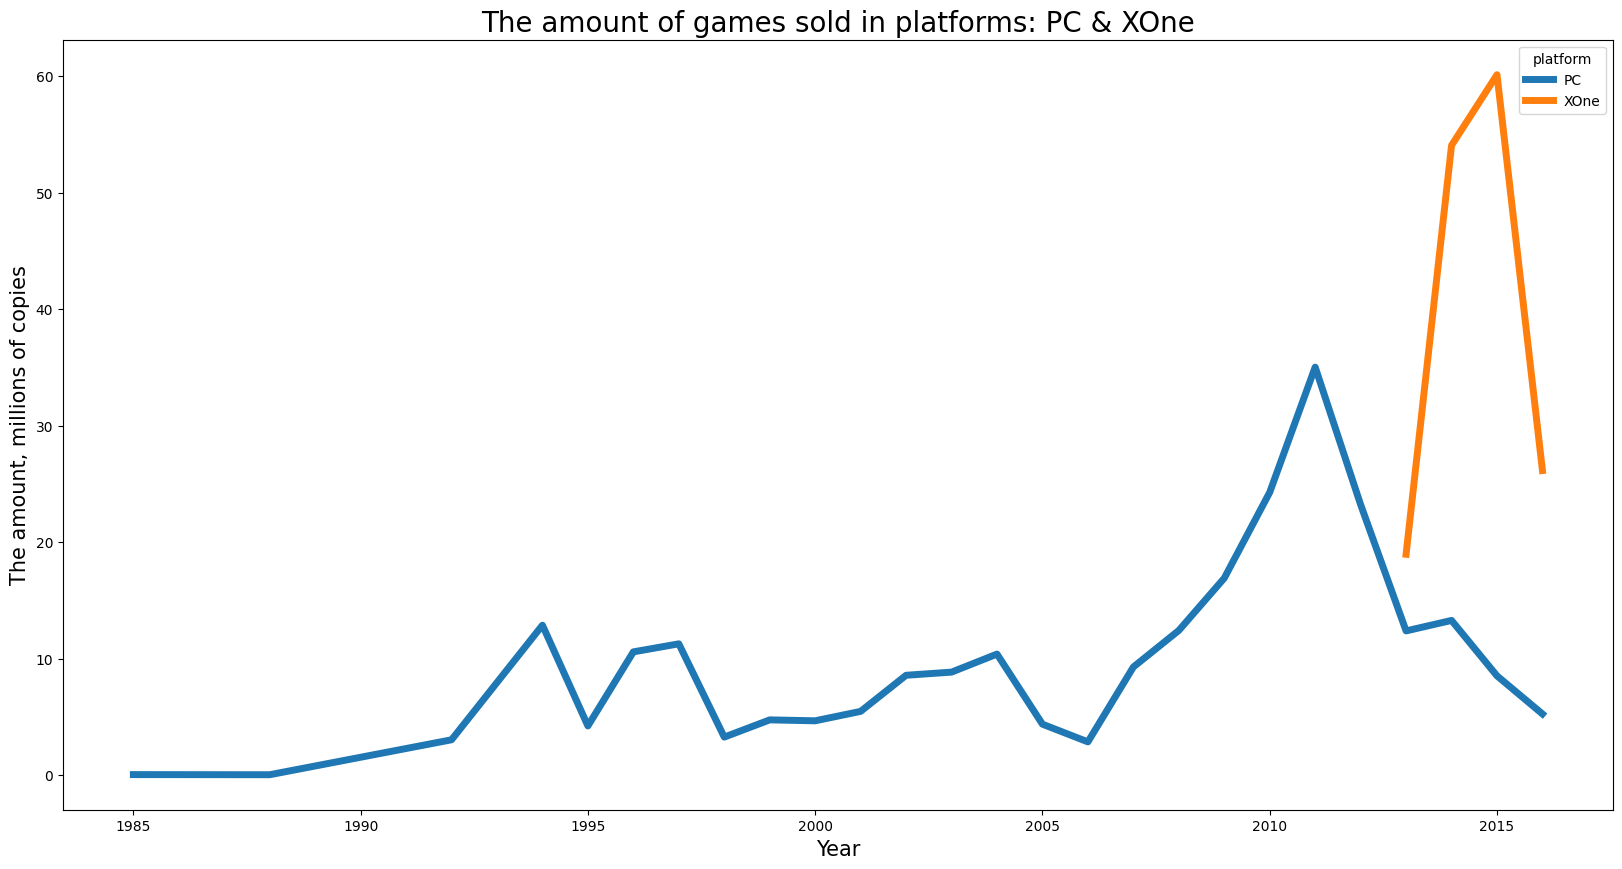

In [51]:
# Platforms - 'PC' and 'XOne'
top = ('PC', 'XOne')

# Line graph of sales by year for 'PC' and 'XOne' platforms
data.query('platform in @top and year_of_release > 0').\
pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='sum').reset_index().\
plot(x='year_of_release', figsize=(20,10), linewidth=5)
plt.title('The amount of games sold in platforms: PC & XOne', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('The amount, millions of copies', fontsize=15)
plt.show();

In [52]:
# Filtering by data
# Measurement data can be taken from 2014 as the 'XOne' platform does not have measurement of scores before 2014
xbox_one_ratings = data[(data['platform'] == 'XOne') & (data['user_score'] > 0) & (data['year_of_release'] >= 2014)]['user_score']
pc_ratings = data[(data['platform'] == 'PC') & (data['user_score'] > 0) & (data['year_of_release'] >= 2014)]['user_score']

In [53]:
# results = method invocation for hypothesis testing
results = stats.ttest_ind(
    xbox_one_ratings,
    pc_ratings,
    equal_var = False)

# alpha
alpha = .05

# displaying the p-value on the screen
print('p-значение:', results.pvalue)
# conditional statement with output of the answer string
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-значение: 0.11601398086668827
Failed to reject the null hypothesis


In [54]:
print(f'Average Xbox One user rating: {xbox_one_ratings.mean().round(2)}')
print(f'Average user rating of PCs: {pc_ratings.mean().round(2)}')

Average Xbox One user rating: 6.59
Average user rating of PCs: 6.3


In [55]:
print(xbox_one_ratings.describe())

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64


In [56]:
print(pc_ratings.describe())

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


**Findings from 5.1**

- **Failed to reject the null hypothesis**
- Xbox One user rating in the range 5.21 - 7.97, mean 6.59
- PC user rating in the range 4.60 - 8.00, mean 6.30

#### 5.2 - Average user ratings of Action and Sports genres are different.

```
H_0: Average user ratings (user_score) Action = Sports
H_a: Average user ratings (user_score) Action != Sports
alpha = 0.05
```

In [57]:
# Filtering by data (with filtering by dates 2014 - 2016)
action_ratings = data[(data['genre'] == 'Action') & (data['user_score'] > 0) & (data['year_of_release'] >= 2014)]['user_score']
sports_ratings = data[(data['genre'] == 'Sports') & (data['user_score'] > 0) & (data['year_of_release'] >= 2014)]['user_score']

In [58]:
# results = method invocation for hypothesis testing
results = stats.ttest_ind(
    action_ratings,
    sports_ratings,
    equal_var = False)

# alpha
alpha = .05

# displaying the p-value on the screen
print('p-значение:', results.pvalue)
# conditional statement with output of the answer string
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-значение: 1.1825550382644557e-14
Rejecting the null hypothesis


In [59]:
print(f'Average user (user_score) rating of Action: {action_ratings.mean().round(2)}')
print(f'Average user (user_score) rating of Sports: {sports_ratings.mean().round(2)}')

Average user (user_score) rating of Action: 6.76
Average user (user_score) rating of Sports: 5.23


In [60]:
print(action_ratings.describe())

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64


In [61]:
print(sports_ratings.describe())

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64


**Conclusion of 5.2**

- **Reject the null hypothesis**
- User (user_score) rating of Action in the range 5.38 - 8.14, mean 6.76.
- User (user_score) rating of Sports in the range 3.37 - 7.09, mean 5.23
- (user_score) Action **>** (user_score) Sports

### 6. General conclusion

<font color='4682B4'><b>Conclusion on the project online shop "Streamchik"<b></font>
<br />
<font color='4682B4'>

The data has been analysed and a study has been carried out to identify the patterns that determine the success of computer games sales, which will allow betting on a potentially popular product and planning advertising campaigns.
    

	In the course of the study general conclusions are drawn from the data including hypotheses:
           
- 1. Conclusion on the number of games released in different years;
- 2. Top platforms by number of games and the dependence of game sales on the model of game console;
- 3. Top platforms and average time of their relevance on the market;
- 4. Dependence of game sales on genre;
- 5. The influence of user and critic reviews on game sales within the selected platform;
- 6. The dependence of game sales on the assigned rating;
- Hypothesis 1: The average user ratings of Xbox One and PC platforms are the same;
- Hypothesis 2: Average user ratings of Action and Sports genres are different.


**Hypothesis 1** - (Number of games released in different years):
        
- The graph shows that very few games were released before 1993 due to the lack of good and affordable platforms;
- From 1994 to 2009 there was a rapid growth of the video game market, reaching up to 1400 games per year, this is due to the development of new devices, the release of new operating systems and new game platforms;
- After 2009, the market experienced a decline in the "consumption" of game content specifically on fixed platforms, with the emergence of mobile devices and social networks, most consumers moved to these new platforms for games.
    
RECOMMENDATION: It is worth looking for new markets and more detailed consumer research, as an option you can switch to selling games on mobile platforms or focus on popular platforms (PS4, XOne) and genres (Action, Sports) while the market is declining.

**Findings 2** - (Top platforms by number of games and the dependence of game sales on the model of game console):

- The most popular platforms with the maximum number of released games are Sony PlayStation console of different versions and Microsoft Xbox 360 console, followed by Wii and DS consoles, and the rest are far behind the leaders.

**Findings 3** - (The best platforms and their average time of relevance in the market):  

- **The analysis concludes that gaming platforms have been relevant for an average of 10 years:**
- PS - was relevant from 1994 to 2003, almost 10 years;
- PS2 - was relevant from 2000 to 2011, 11 years;
- PS3 - was relevant from 2006 to 2016 - 10 years;
- DS - increasing in popularity from 2004 to 2013 - 8 years;
- Wii - was relevant from 2006 to 2016 - 10 years.

    - **Best platforms from 2014:**.
- The leaders in North America and in Europe are PS4 and XOne;
- PS4 is more popular in Europe and XOne is more popular in North America;
- In Japan, the 3DS is the absolute leader, the next most popular platform is the PS4 and after that the PS3.

**Findings 4** - (Dependence of game sales on genre):  
        
- The leaders in terms of number of games are Action genre. in 2nd place is Sports genre.
- Revenue from sales in some genres is almost the same, although the number of sold games may differ, it may speak about the price of the game in a particular genre, games in certain genres are cheaper or more expensive (this may be due to the cost of production as the production of games in the genre Puzzle is much cheaper than the genre Sports or Action).
- Top 3 by number of games: Action, Sports, Misc
- Top 3 by sales: Action, Sports, Shooter
- Top 3 by median sales: Platform, Shooter, Sports
- Most lagging genres: Puzzle, Strategy, Adventure

**Findings 5** - (Impact of user and critic reviews on game sales within the selected platform):

- For PS4, XOne platforms in North America and Europe, player ratings have no effect on sales, but in Japan for these platforms there is a correlation, albeit slight, PS4 is 0.17 and XOne is 0.07 respectively;
- For the 3DS platform, critic and player scores are almost identical in terms of correlation, and in Japan they are 0.27;
- **Average [critic_score] 0.3 -vs- [user_score] < 0.1 (for Europe and North America).
    
**Findings 6** - (Dependence of game sales on rating):  
    
- The values of North America and Europe are almost the same, so the category "> 17 years old" is in 1st place, followed by the category "For Everyone";
- In Japan, the most popular category is "> 13 years old", and the categories "> 17 years old" and "For All" are in 2nd and 3rd place with a slight difference.
    
**Hypothesis 1** - (Average user ratings of Xbox One and PC platforms are the same) - **We failed to reject the null hypothesis:**
        
- **Save the null hypothesis: Average user ratings (user_score) Xbox One = PC;**
- Xbox One user ratings (user_score) range from 5.21 - 7.97, mean 6.59;
- PC user rating (user_score) in the range 4.60 - 8.00, mean 6.30.

**Hypothesis 2** - (Average user ratings of Action and Sports genres are different) - **Reject the null hypothesis:**
        
- **Accept the alternative hypothesis: The average user ratings (user_score) of Action and Sports genres are different;**
- User_score of Action in the range 5.38 - 8.14, mean 6.76;
- User rating (user_score) Sports in the range 3.37 - 7.09, average 5.23;
- **(user_score) Action > (user_score) Sports.**